# Efficient Flight Results Analysis

This notebook analyzes the efficient flight experimental results from feedback data logs.

**Workflow:**
1. Load feedback CSV files (feedback_0.csv, feedback_1.csv, feedback_2.csv, feedback_3.csv)
2. Data exploration and visualization
3. Performance analysis and comparisons

## 1. Import Required Libraries

In [91]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Configuration

In [92]:
# Configuration
data_dir = Path('../logs/09-10/xwing1_turn12')  # Directory containing feedback CSV files
output_dir = Path('./data')
output_dir.mkdir(parents=True, exist_ok=True)

print(f"Data directory: {data_dir}")
print(f"Output directory: {output_dir}")

Data directory: ../logs/09-10/xwing1_turn12
Output directory: data


## 3. Load Feedback Data Files

Load all feedback CSV files (feedback_0.csv through feedback_3.csv).

In [93]:
# Load feedback data files
print("Loading feedback data files...\n")

feedback_data = {}

for i in range(4):
    file_path = data_dir / f'feedback_{i}.csv'
    
    if file_path.exists():
        df = pd.read_csv(file_path)
        feedback_data[i] = df
        print(f"✓ Loaded feedback_{i}.csv: {len(df)} rows, {len(df.columns)} columns")
        print(f"  Columns: {list(df.columns)}")
    else:
        print(f"⚠ Warning: feedback_{i}.csv not found")

print(f"\n✓ Loaded {len(feedback_data)} feedback files successfully")

Loading feedback data files...

✓ Loaded feedback_0.csv: 25164 rows, 4 columns
  Columns: ['elapsed time', 'timestamp', 'topic', 'value']
✓ Loaded feedback_1.csv: 25164 rows, 4 columns
  Columns: ['elapsed time', 'timestamp', 'topic', 'value']
✓ Loaded feedback_2.csv: 25164 rows, 4 columns
  Columns: ['elapsed time', 'timestamp', 'topic', 'value']
✓ Loaded feedback_3.csv: 25164 rows, 4 columns
  Columns: ['elapsed time', 'timestamp', 'topic', 'value']

✓ Loaded 4 feedback files successfully


## 4. Data Overview

Display basic information about each dataset.

In [94]:
# Display overview of each dataset
for i, df in feedback_data.items():
    print("=" * 80)
    print(f"FEEDBACK_{i}.CSV - Overview")
    print("=" * 80)
    print(f"Shape: {df.shape}")
    print(f"\nFirst 5 rows:")
    print(df.head())
    print(f"\nSummary statistics:")
    print(df.describe())
    print("\n")

FEEDBACK_0.CSV - Overview
Shape: (25164, 4)

First 5 rows:
   elapsed time     timestamp                          topic     value
0      0.090748  1.760033e+09  /xwing/rotor_feedback.data[0]  22.41008
1      0.090762  1.760033e+09  /xwing/rotor_feedback.data[0]  22.41008
2      0.090787  1.760033e+09  /xwing/rotor_feedback.data[0]  14.87024
3      0.090800  1.760033e+09  /xwing/rotor_feedback.data[0]  14.87024
4      0.090815  1.760033e+09  /xwing/rotor_feedback.data[0]  14.87024

Summary statistics:
       elapsed time     timestamp         value
count  25164.000000  2.516400e+04  25164.000000
mean      12.629225  1.760033e+09   1134.895459
std        7.304975  7.304975e+00    345.644422
min        0.090748  1.760033e+09     13.404160
25%        6.302896  1.760033e+09   1150.349243
50%       12.608308  1.760033e+09   1202.709229
75%       18.945890  1.760033e+09   1271.510254
max       25.270446  1.760033e+09   1896.898071


FEEDBACK_1.CSV - Overview
Shape: (25164, 4)

First 5 rows:
 

## 5. Plot All Feedback Data

Create visualizations for all feedback datasets.

Creating plots for all feedback data...

Plotting feedback_0...


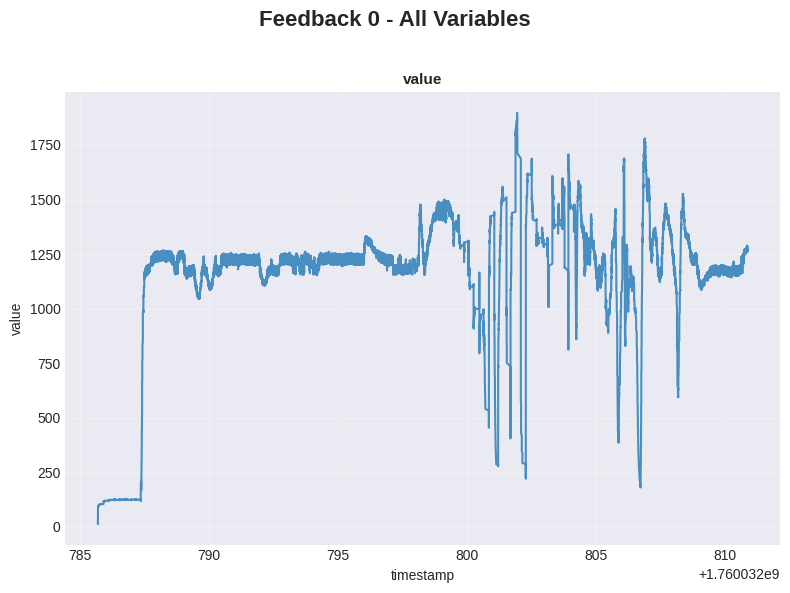

  ✓ Saved: feedback_0_all_variables.png
Plotting feedback_1...


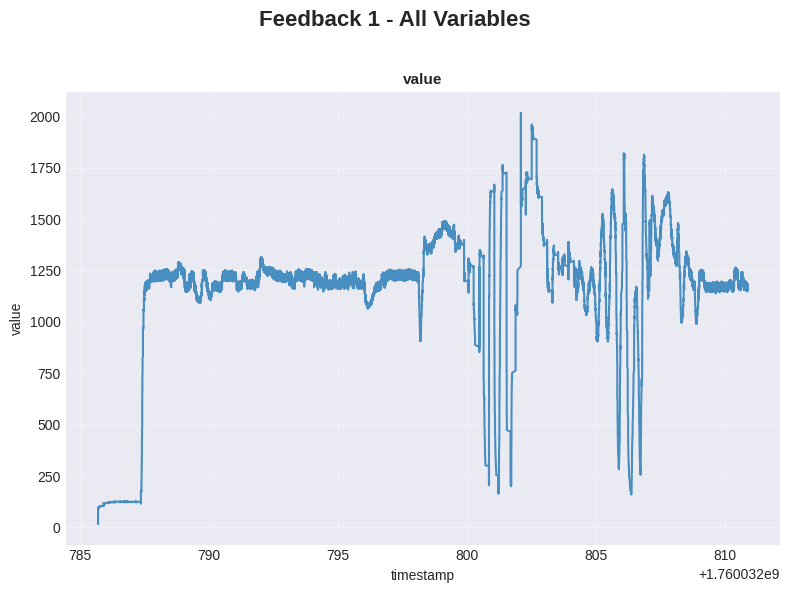

  ✓ Saved: feedback_1_all_variables.png
Plotting feedback_2...


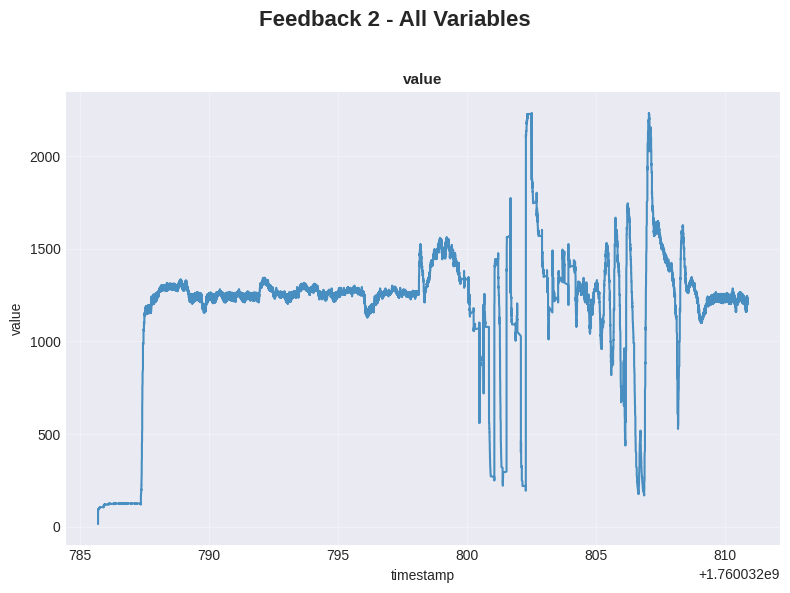

  ✓ Saved: feedback_2_all_variables.png
Plotting feedback_3...


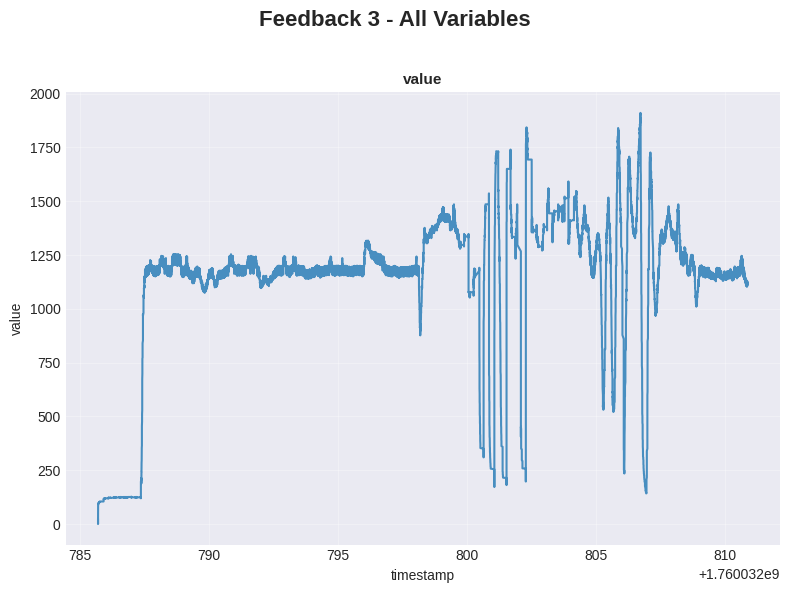

  ✓ Saved: feedback_3_all_variables.png

✓ All plots created successfully


In [95]:
# Plot each feedback dataset
print("Creating plots for all feedback data...\n")

for i, df in feedback_data.items():
    print(f"Plotting feedback_{i}...")
    
    # Get numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove time and elapsed time columns (we'll use time as x-axis)
    time_col = None
    exclude_cols = ['time', 'timestamp', 't', 'elapsed_time', 'elapsed time', 'elapsed']
    
    for col in ['time', 'timestamp', 't']:
        if col in numeric_cols:
            time_col = col
            break
    
    # Remove all excluded columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    # If no time column, create index-based x-axis
    if time_col is None:
        x_data = np.arange(len(df))
        x_label = 'Sample Index'
    else:
        x_data = df[time_col]
        x_label = time_col
    
    # Calculate grid dimensions
    n_cols = len(numeric_cols)
    
    if n_cols > 0:
        if n_cols == 1:
            # Single plot - no subplots
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            fig.suptitle(f'Feedback {i} - All Variables', fontsize=16, fontweight='bold', y=0.98)
            
            col = numeric_cols[0]
            ax.plot(x_data, df[col], linewidth=1.5, alpha=0.8)
            ax.set_xlabel(x_label, fontsize=10)
            ax.set_ylabel(col, fontsize=10)
            ax.set_title(col, fontsize=11, fontweight='bold')
            ax.grid(True, alpha=0.3)
        else:
            # Multiple plots - use grid
            n_rows = (n_cols + 2) // 3  # 3 plots per row
            
            fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
            fig.suptitle(f'Feedback {i} - All Variables', fontsize=16, fontweight='bold', y=0.98)
            
            # Flatten axes array for easy iteration
            if n_rows == 1:
                axes = axes.reshape(1, -1)
            axes = axes.flatten()
            
            # Plot each numeric column
            for idx, col in enumerate(numeric_cols):
                ax = axes[idx]
                ax.plot(x_data, df[col], linewidth=1.5, alpha=0.8)
                ax.set_xlabel(x_label, fontsize=10)
                ax.set_ylabel(col, fontsize=10)
                ax.set_title(col, fontsize=11, fontweight='bold')
                ax.grid(True, alpha=0.3)
            
            # Hide unused subplots
            for idx in range(len(numeric_cols), len(axes)):
                axes[idx].set_visible(False)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(output_dir / f'feedback_{i}_all_variables.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"  ✓ Saved: feedback_{i}_all_variables.png")
    else:
        print(f"  ⚠ No numeric columns found in feedback_{i}")

print("\n✓ All plots created successfully")


## 6. Combined Comparison Plot

Compare the same variables across all feedback datasets.

Common columns across all datasets: ['timestamp', 'value', 'elapsed time', 'topic']

Creating comparison plots for 1 common variables...



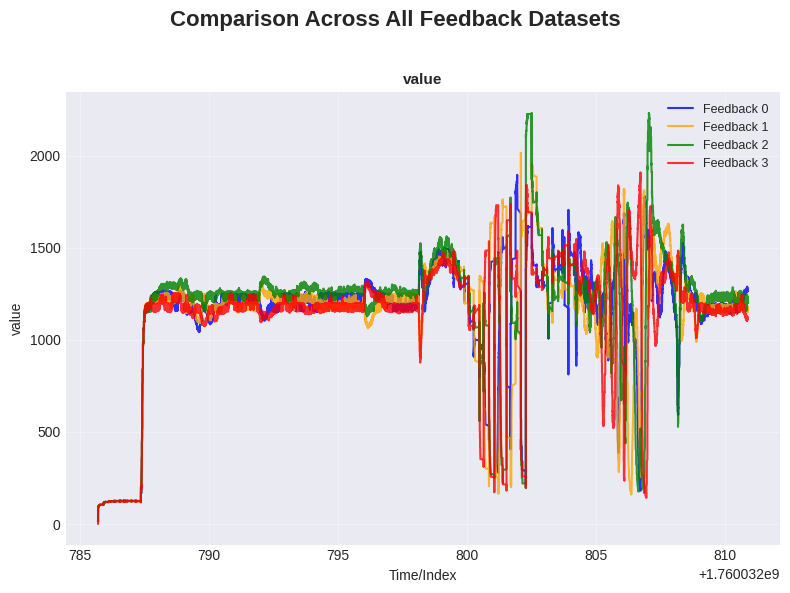

✓ Saved: feedback_comparison_all.png


In [96]:
# Find common columns across all datasets
if len(feedback_data) > 1:
    common_cols = set(feedback_data[0].columns)
    for i in range(1, len(feedback_data)):
        common_cols = common_cols.intersection(set(feedback_data[i].columns))
    
    common_cols = list(common_cols)
    print(f"Common columns across all datasets: {common_cols}\n")
    
    # Filter to numeric columns only
    common_numeric = [col for col in common_cols if feedback_data[0][col].dtype in [np.float64, np.int64, np.float32, np.int32]]
    
    # Remove time and elapsed time columns
    exclude_cols = ['time', 'timestamp', 't', 'elapsed_time', 'elapsed time', 'elapsed']
    common_numeric = [col for col in common_numeric if col not in exclude_cols]
    
    if len(common_numeric) > 0:
        print(f"Creating comparison plots for {len(common_numeric)} common variables...\n")
        
        # Calculate grid dimensions based on actual number of variables
        n_vars = len(common_numeric)
        
        if n_vars == 1:
            # Single plot - no subplots
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            fig.suptitle('Comparison Across All Feedback Datasets', fontsize=16, fontweight='bold', y=0.98)
            
            colors = ['blue', 'orange', 'green', 'red']
            var = common_numeric[0]
            
            for i, df in feedback_data.items():
                # Determine x-axis
                time_col = None
                for col in ['time', 'timestamp', 't']:
                    if col in df.columns:
                        time_col = col
                        break
                
                if time_col:
                    x_data = df[time_col]
                else:
                    x_data = np.arange(len(df))
                
                ax.plot(x_data, df[var], linewidth=1.5, alpha=0.8, 
                       color=colors[i % len(colors)], label=f'Feedback {i}')
            
            ax.set_xlabel('Time/Index', fontsize=10)
            ax.set_ylabel(var, fontsize=10)
            ax.set_title(var, fontsize=11, fontweight='bold')
            ax.legend(fontsize=9, loc='best')
            ax.grid(True, alpha=0.3)
        else:
            # Multiple plots - use grid
            n_rows = (n_vars + 2) // 3
            
            fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
            fig.suptitle('Comparison Across All Feedback Datasets', fontsize=16, fontweight='bold', y=0.98)
            
            if n_rows == 1:
                axes = axes.reshape(1, -1)
            axes = axes.flatten()
            
            colors = ['blue', 'orange', 'green', 'red']
            
            for idx, var in enumerate(common_numeric):
                ax = axes[idx]
                
                for i, df in feedback_data.items():
                    # Determine x-axis
                    time_col = None
                    for col in ['time', 'timestamp', 't']:
                        if col in df.columns:
                            time_col = col
                            break
                    
                    if time_col:
                        x_data = df[time_col]
                    else:
                        x_data = np.arange(len(df))
                    
                    ax.plot(x_data, df[var], linewidth=1.5, alpha=0.8, 
                           color=colors[i % len(colors)], label=f'Feedback {i}')
                
                ax.set_xlabel('Time/Index', fontsize=10)
                ax.set_ylabel(var, fontsize=10)
                ax.set_title(var, fontsize=11, fontweight='bold')
                ax.legend(fontsize=9, loc='best')
                ax.grid(True, alpha=0.3)
            
            # Hide unused subplots
            for idx in range(len(common_numeric), len(axes)):
                axes[idx].set_visible(False)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(output_dir / 'feedback_comparison_all.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Saved: feedback_comparison_all.png")
    else:
        print("⚠ No common numeric variables found for comparison")
else:
    print("⚠ Need at least 2 feedback files for comparison")


## 6b. Average Across All Feedback Datasets

Plot the average (mean) values across all feedback datasets with standard deviation bands.


Creating average plots for 1 common variables...



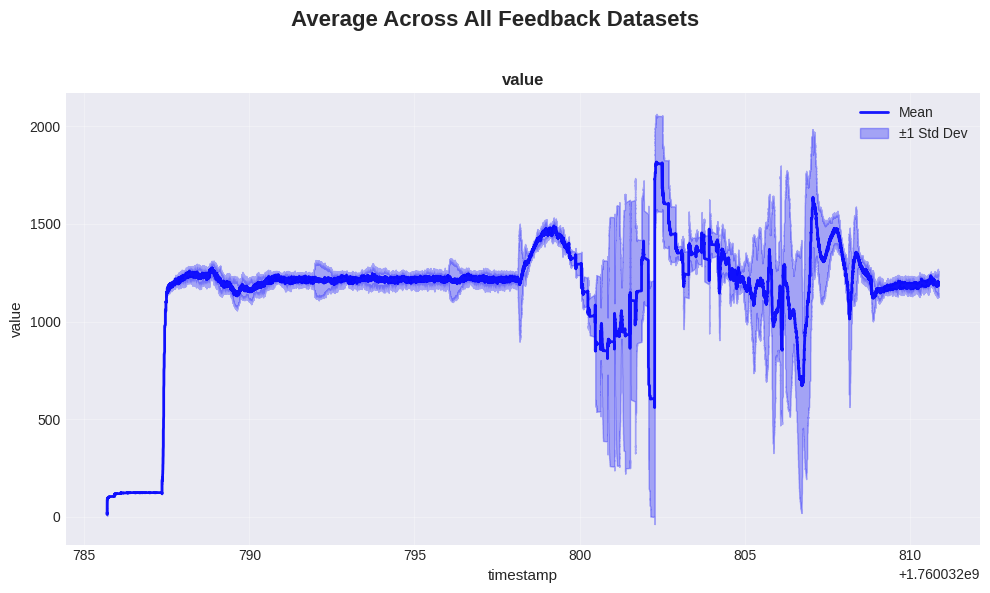

✓ Saved: feedback_average.png
  Data truncated to minimum length: 25164 samples


In [97]:
# Plot average across all feedback datasets
if len(feedback_data) > 1:
    common_cols = set(feedback_data[0].columns)
    for i in range(1, len(feedback_data)):
        common_cols = common_cols.intersection(set(feedback_data[i].columns))
    
    common_cols = list(common_cols)
    
    # Filter to numeric columns only
    common_numeric = [col for col in common_cols if feedback_data[0][col].dtype in [np.float64, np.int64, np.float32, np.int32]]
    
    # Remove time and elapsed time columns
    exclude_cols = ['time', 'timestamp', 't', 'elapsed_time', 'elapsed time', 'elapsed']
    common_numeric = [col for col in common_numeric if col not in exclude_cols]
    
    if len(common_numeric) > 0:
        print(f"Creating average plots for {len(common_numeric)} common variables...\n")
        
        # Find the minimum length across all datasets for alignment
        min_length = min(len(df) for df in feedback_data.values())
        
        # Calculate grid dimensions based on actual number of variables
        n_vars = len(common_numeric)
        
        if n_vars == 1:
            # Single plot - no subplots
            fig, ax = plt.subplots(1, 1, figsize=(10, 6))
            fig.suptitle('Average Across All Feedback Datasets', fontsize=16, fontweight='bold', y=0.98)
            
            var = common_numeric[0]
            
            # Collect data from all datasets (truncated to min_length)
            all_data = []
            for i, df in feedback_data.items():
                all_data.append(df[var].values[:min_length])
            
            # Convert to numpy array for easy calculation
            all_data = np.array(all_data)
            mean_values = np.mean(all_data, axis=0)
            std_values = np.std(all_data, axis=0)
            
            # Determine x-axis
            time_col = None
            for col in ['time', 'timestamp', 't']:
                if col in feedback_data[0].columns:
                    time_col = col
                    break
            
            if time_col:
                x_data = feedback_data[0][time_col].values[:min_length]
                x_label = time_col
            else:
                x_data = np.arange(min_length)
                x_label = 'Sample Index'
            
            # Plot mean line
            ax.plot(x_data, mean_values, linewidth=2, color='blue', label='Mean', alpha=0.9)
            
            # Plot standard deviation band
            ax.fill_between(x_data, mean_values - std_values, mean_values + std_values, 
                           alpha=0.3, color='blue', label='±1 Std Dev')
            
            ax.set_xlabel(x_label, fontsize=11)
            ax.set_ylabel(var, fontsize=11)
            ax.set_title(var, fontsize=12, fontweight='bold')
            ax.legend(fontsize=10, loc='best')
            ax.grid(True, alpha=0.3)
        else:
            # Multiple plots - use grid
            n_rows = (n_vars + 2) // 3
            
            fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
            fig.suptitle('Average Across All Feedback Datasets', fontsize=16, fontweight='bold', y=0.98)
            
            if n_rows == 1:
                axes = axes.reshape(1, -1)
            axes = axes.flatten()
            
            for idx, var in enumerate(common_numeric):
                ax = axes[idx]
                
                # Collect data from all datasets (truncated to min_length)
                all_data = []
                for i, df in feedback_data.items():
                    all_data.append(df[var].values[:min_length])
                
                # Convert to numpy array for easy calculation
                all_data = np.array(all_data)
                mean_values = np.mean(all_data, axis=0)
                std_values = np.std(all_data, axis=0)
                
                # Determine x-axis
                time_col = None
                for col in ['time', 'timestamp', 't']:
                    if col in feedback_data[0].columns:
                        time_col = col
                        break
                
                if time_col:
                    x_data = feedback_data[0][time_col].values[:min_length]
                else:
                    x_data = np.arange(min_length)
                
                # Plot mean line
                ax.plot(x_data, mean_values, linewidth=2, color='blue', alpha=0.9)
                
                # Plot standard deviation band
                ax.fill_between(x_data, mean_values - std_values, mean_values + std_values, 
                               alpha=0.3, color='blue')
                
                ax.set_xlabel('Time/Index', fontsize=10)
                ax.set_ylabel(var, fontsize=10)
                ax.set_title(var, fontsize=11, fontweight='bold')
                ax.grid(True, alpha=0.3)
            
            # Hide unused subplots
            for idx in range(len(common_numeric), len(axes)):
                axes[idx].set_visible(False)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(output_dir / 'feedback_average.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Saved: feedback_average.png")
        print(f"  Data truncated to minimum length: {min_length} samples")
    else:
        print("⚠ No common numeric variables found for averaging")
else:
    print("⚠ Need at least 2 feedback files for averaging")


## 7. X-Y Turn Trajectory Plot

Visualize the trajectory from the x and y CSV files.


Loading x.csv and y.csv...
✓ Loaded x.csv: 14095 rows, 4 columns
  Columns: ['elapsed time', 'timestamp', 'topic', 'value']
✓ Loaded y.csv: 14095 rows, 4 columns
  Columns: ['elapsed time', 'timestamp', 'topic', 'value']

Plotting X and Y positions over time (14095 points)...


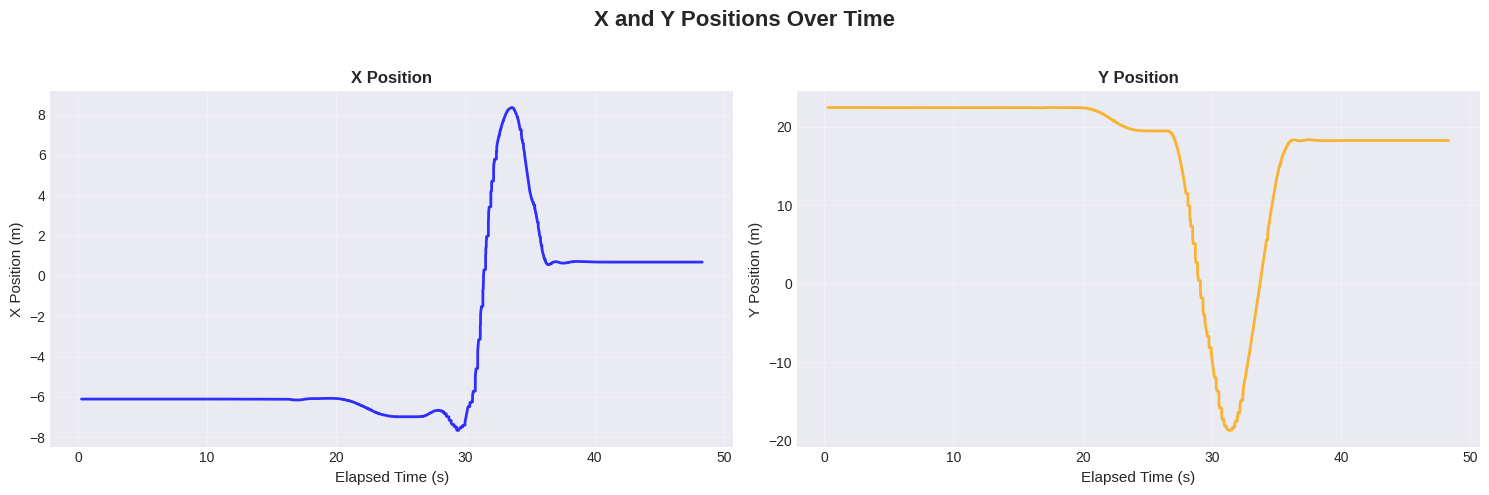

✓ Saved: x_y_positions_over_time.png

Plotting X-Y trajectory...


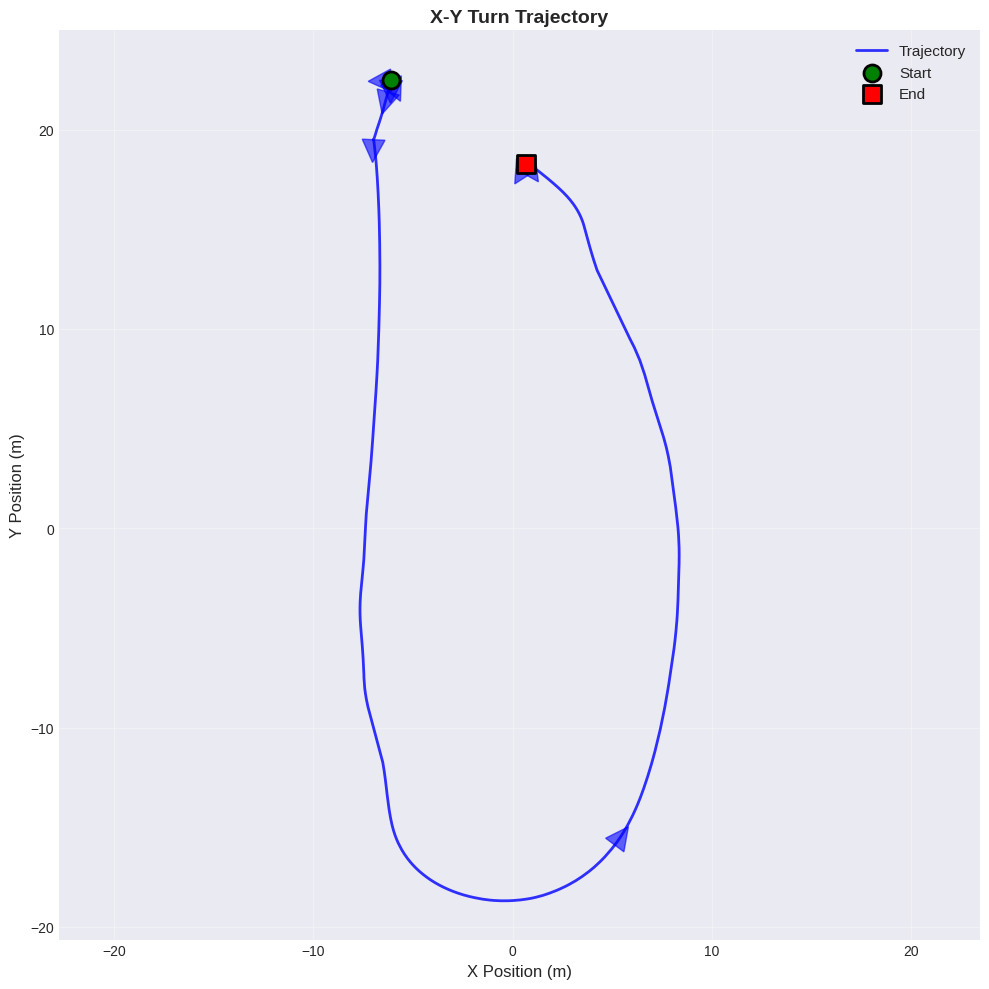

✓ Saved: x_y_turn_trajectory.png

Data summary:
  Number of points: 14095
  X range: [-7.66, 8.35] m
  Y range: [-18.69, 22.47] m


In [98]:
# Load and plot trajectory from x.csv and y.csv
x_file = data_dir / 'x.csv'
y_file = data_dir / 'y.csv'

if x_file.exists() and y_file.exists():
    print(f"Loading {x_file.name} and {y_file.name}...")
    
    # Load x and y data
    df_x = pd.read_csv(x_file)
    df_y = pd.read_csv(y_file)
    
    print(f"✓ Loaded x.csv: {len(df_x)} rows, {len(df_x.columns)} columns")
    print(f"  Columns: {list(df_x.columns)}")
    print(f"✓ Loaded y.csv: {len(df_y)} rows, {len(df_y.columns)} columns")
    print(f"  Columns: {list(df_y.columns)}")
    
    # Extract the 'value' column (actual position data) and 'elapsed time' column
    x_data = df_x['value'].values
    y_data = df_y['value'].values
    time_x = df_x['elapsed time'].values
    time_y = df_y['elapsed time'].values
    
    # Ensure both have the same length
    min_len = min(len(x_data), len(y_data))
    x_data = x_data[:min_len]
    y_data = y_data[:min_len]
    time_x = time_x[:min_len]
    time_y = time_y[:min_len]
    
    print(f"\nPlotting X and Y positions over time ({min_len} points)...")
    
    # Plot 1: X and Y over time
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('X and Y Positions Over Time', fontsize=16, fontweight='bold', y=0.98)
    
    # X position over time
    axes[0].plot(time_x, x_data, linewidth=2, alpha=0.8, color='blue')
    axes[0].set_xlabel('Elapsed Time (s)', fontsize=11)
    axes[0].set_ylabel('X Position (m)', fontsize=11)
    axes[0].set_title('X Position', fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Y position over time
    axes[1].plot(time_y, y_data, linewidth=2, alpha=0.8, color='orange')
    axes[1].set_xlabel('Elapsed Time (s)', fontsize=11)
    axes[1].set_ylabel('Y Position (m)', fontsize=11)
    axes[1].set_title('Y Position', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(output_dir / 'x_y_positions_over_time.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: x_y_positions_over_time.png")
    
    # Plot 2: X-Y trajectory
    print(f"\nPlotting X-Y trajectory...")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Plot trajectory
    ax.plot(x_data, y_data, linewidth=2, alpha=0.8, color='blue', label='Trajectory')
    
    # Mark start and end points
    ax.scatter(x_data[0], y_data[0], 
              color='green', s=150, marker='o', label='Start', zorder=5, edgecolors='black', linewidths=2)
    ax.scatter(x_data[-1], y_data[-1], 
              color='red', s=150, marker='s', label='End', zorder=5, edgecolors='black', linewidths=2)
    
    # Add direction arrows
    n_arrows = 8
    arrow_indices = np.linspace(0, len(x_data)-1, n_arrows+2, dtype=int)[1:-1]
    for idx in arrow_indices:
        if idx + 1 < len(x_data):
            dx = x_data[idx+1] - x_data[idx]
            dy = y_data[idx+1] - y_data[idx]
            # Calculate arrow size based on data scale
            arrow_scale = (np.ptp(x_data) + np.ptp(y_data)) / 40
            ax.arrow(x_data[idx], y_data[idx], 
                    dx*0.3, dy*0.3, 
                    head_width=arrow_scale*0.8, 
                    head_length=arrow_scale*0.8, 
                    fc='blue', ec='blue', alpha=0.6)
    
    ax.set_xlabel('X Position (m)', fontsize=12)
    ax.set_ylabel('Y Position (m)', fontsize=12)
    ax.set_title('X-Y Turn Trajectory', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    ax.axis('equal')  # Equal aspect ratio for accurate visualization
    
    plt.tight_layout()
    plt.savefig(output_dir / 'x_y_turn_trajectory.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: x_y_turn_trajectory.png")
    print(f"\nData summary:")
    print(f"  Number of points: {min_len}")
    print(f"  X range: [{x_data.min():.2f}, {x_data.max():.2f}] m")
    print(f"  Y range: [{y_data.min():.2f}, {y_data.max():.2f}] m")
else:
    if not x_file.exists():
        print(f"⚠ Warning: {x_file.name} not found in {data_dir}")
    if not y_file.exists():
        print(f"⚠ Warning: {y_file.name} not found in {data_dir}")


## 8. Analysis Complete